In [126]:
import pandas as pd
import random
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

In [127]:
#input data 
creditData=pd.read_csv('/Users/Mandy/Study/SpringBoard/Capstone 1/Data/Modified Dataset.csv', header=0)

In [128]:
#subset macro-economic data
limit_bal=creditData.iloc[:,1]
sex=creditData.iloc[:,2]
education=creditData.iloc[:,3]
marriage=creditData.iloc[:,4]
age=creditData.iloc[:,5]
pay_0=creditData.iloc[:,6]
pay_2=creditData.iloc[:,7]
pay_3=creditData.iloc[:,8]
pay_4=creditData.iloc[:,9]
pay_5=creditData.iloc[:,10]
pay_6=creditData.iloc[:,11]
bill_amt1=creditData.iloc[:,12]
bill_amt2=creditData.iloc[:,13]
bill_amt3=creditData.iloc[:,14]
bill_amt4=creditData.iloc[:,15]
bill_amt5=creditData.iloc[:,16]
bill_amt6=creditData.iloc[:,17]
pay_amt1=creditData.iloc[:,18]
pay_amt2=creditData.iloc[:,19]
pay_amt3=creditData.iloc[:,20]
pay_amt4=creditData.iloc[:,21]
pay_amt5=creditData.iloc[:,22]
pay_amt6=creditData.iloc[:,23]
interest_rate=creditData.iloc[:,24]
employed_persons=creditData.iloc[:,25]
cpi=creditData.iloc[:,26]
consumer_confidence=creditData.iloc[:,27]
default_next_month=creditData.iloc[:,28]


In [129]:
# randomly pick the monthly datas to each cells for economic datas

for index,rowValue in interest_rate.iteritems():
        interest_rate[index]=random.choice([1.88,2,2.13])

for index,rowValue in employed_persons.iteritems():
        employed_persons[index]=random.choice([9916,9929,9931,9933,9949,9969])
        
for index,rowValue in cpi.iteritems():
        cpi[index]=random.choice([92.02,92.53,92.82,93.9,94.6,94.73])

for index,rowValue in consumer_confidence.iteritems():
        consumer_confidence[index]=random.choice([73.15,73.06,74.79,73.15,73.38,71.42])


In [130]:
#Data Exploration
default_next_month.value_counts()

0    23364
1     6636
Name: Default_Next_Month, dtype: int64

In [131]:
creditData.groupby('Default_Next_Month').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Interest_Rate,Employed_Persons,CPI,Consumer_Confidence
Default_Next_Month,,,,,,,,,,,,,,,,,,,,,
0,15064.893982,178099.726074,1.614150,1.841337,1.558637,35.417266,-0.211222,-0.301917,-0.316256,-0.355633,...,6307.337357,6640.465074,5753.496833,5300.529319,5248.220296,5719.371769,1.665725,9937.972479,92.831750,72.827555
1,14773.781947,130109.656420,1.567058,1.894665,1.528029,35.725738,0.668174,0.458258,0.362116,0.254521,...,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068,1.655515,9938.199668,92.833635,72.838608


In [132]:
creditData.groupby('SEX').mean()

,ID,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Interest_Rate,Employed_Persons,CPI,Consumer_Confidence,Default_Next_Month
SEX,,,,,,,,,,,,,,,,,,,,,
1,14802.770104,163519.825034,1.839250,1.572090,36.519431,0.063257,-0.029189,-0.068557,-0.133832,-0.189182,...,5960.720138,5412.506057,4869.177995,4830.827052,5276.196753,1.663106,9938.089081,92.837147,72.817799,0.241672
2,15130.282078,170086.462014,1.862246,1.538593,34.806868,-0.069181,-0.202407,-0.230289,-0.277661,-0.316751,...,5895.200088,5103.057255,4797.786992,4778.752043,5175.665305,1.663704,9937.979185,92.828898,72.838008,0.207763


In [133]:
creditData.groupby('MARRIAGE').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Interest_Rate,Employed_Persons,CPI,Consumer_Confidence,Default_Next_Month
MARRIAGE,,,,,,,,,,,,,,,,,,,,,
0,15755.796296,132962.962963,1.740741,2.740741,37.814815,-0.166667,-0.203704,-0.203704,-0.370370,-0.407407,...,2781.944444,4027.944444,2864.222222,2124.518519,2238.388889,1.611111,9941.296296,93.037037,72.814815,0.092593
1,15253.288821,182200.893184,1.620031,1.985138,40.016692,-0.036752,-0.163262,-0.206238,-0.259243,-0.308441,...,6205.714401,5328.491983,5075.922469,4836.070503,5331.664836,1.668863,9938.088147,92.825390,72.823047,0.234717
2,14807.277813,156413.660737,1.589514,1.729454,31.452706,-0.002819,-0.111000,-0.135680,-0.191118,-0.232085,...,5648.984465,5123.063518,4612.971185,4781.813581,5162.734340,1.658607,9937.970559,92.837384,72.833688,0.209283
3,13734.154799,98080.495356,1.594427,2.235294,42.798762,0.170279,0.000000,0.024768,-0.024768,-0.142415,...,7865.136223,6150.086687,5121.179567,4563.919505,3408.987616,1.684211,9937.287926,92.826625,72.944272,0.260062


In [134]:
creditData.groupby('Interest_Rate').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Employed_Persons,CPI,Consumer_Confidence,Default_Next_Month
Interest_Rate,,,,,,,,,,,,,,,,,,,,,
1,14959.670563,167334.952456,1.603308,1.845681,1.557944,35.369453,-0.012381,-0.127872,-0.174326,-0.222662,...,5612.099445,5944.717908,5084.572900,4537.218800,4640.194235,5245.263174,9937.980784,92.823594,72.826763,0.226426
2,15021.210109,167560.088424,1.603949,1.856913,1.548784,35.544363,-0.018891,-0.136756,-0.162078,-0.219654,...,5689.693479,5909.215886,5297.256682,4972.595709,4880.136053,5200.406953,9938.044011,92.836515,72.831642,0.218549


In [135]:
creditData.groupby('Employed_Persons').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Interest_Rate,CPI,Consumer_Confidence,Default_Next_Month
Employed_Persons,,,,,,,,,,,,,,,,,,,,,
9916,15011.139759,166265.060241,1.596988,1.864056,1.557831,35.513052,0.005622,-0.127108,-0.145984,-0.206426,...,5854.469880,6043.221888,5190.811446,4668.340964,4930.648394,5122.122892,1.668675,92.833534,72.851807,0.220683
9929,15229.051783,168600.040298,1.611928,1.846061,1.553697,35.479549,-0.028007,-0.128753,-0.171872,-0.228894,...,5573.741487,6135.728189,5215.767681,4986.073544,4739.669756,5511.435221,1.661294,92.839412,72.809591,0.219625
9931,14917.577626,165786.302470,1.604941,1.849367,1.554931,35.403294,-0.013657,-0.126732,-0.169914,-0.208275,...,5788.924483,5854.240811,5147.937538,4758.394055,4653.281783,5245.774654,1.669010,92.840530,72.825065,0.224945
9933,14926.647344,171468.390224,1.611796,1.832357,1.553626,35.433044,-0.044233,-0.155726,-0.190871,-0.254292,...,5468.881236,5906.713795,5538.918198,4938.150677,4398.878812,5201.922440,1.648354,92.839022,72.847102,0.208847
9949,14912.873064,166900.020117,1.596459,1.857172,1.538322,35.733856,0.001006,-0.134581,-0.156709,-0.215047,...,5825.100181,5603.125327,4847.540937,4988.579763,5045.347415,5187.320861,1.666264,92.831020,72.816335,0.228928
9969,15005.701707,165965.415050,1.600465,1.869085,1.552754,35.354926,-0.020946,-0.129946,-0.162141,-0.211598,...,5475.876067,5981.865787,5407.769201,4625.490109,5018.630334,5031.817300,1.666990,92.810318,72.830101,0.224011


In [136]:
creditData.groupby('CPI').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Interest_Rate,Employed_Persons,Consumer_Confidence,Default_Next_Month
CPI,,,,,,,,,,,,,,,,,,,,,
92,14960.917769,166528.197833,1.605464,1.855414,1.550289,35.488267,-0.017550,-0.137340,-0.169182,-0.222030,...,5725.002858,5864.943163,5202.191385,4837.411155,4713.206940,5366.529283,1.661969,9938.193246,72.831284,0.221166
93,15111.607193,168214.992928,1.605173,1.852698,1.547585,35.536270,-0.033744,-0.154375,-0.192766,-0.234391,...,5614.726611,6146.409376,5296.782582,4561.475248,4943.968883,5139.561326,1.655082,9937.893312,72.816731,0.219438
94,15005.052958,168560.151878,1.600420,1.849920,1.556355,35.456235,-0.006994,-0.118205,-0.148581,-0.211831,...,5595.415168,5894.283074,5225.829636,4939.886990,4857.429556,5026.047962,1.669864,9937.830436,72.834632,0.222122


In [137]:
creditData.groupby('Consumer_Confidence').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Interest_Rate,Employed_Persons,CPI,Default_Next_Month
Consumer_Confidence,,,,,,,,,,,,,,,,,,,,,
71,15184.673242,165516.238294,1.590954,1.860132,1.539151,35.500498,-0.014545,-0.125722,-0.151823,-0.197051,...,5588.346483,5563.907551,4784.151425,4801.828850,4732.924288,5294.743973,1.658896,9938.325164,92.837019,0.213588
73,14973.048097,167666.201666,1.606097,1.856558,1.554757,35.535898,-0.009629,-0.130819,-0.161303,-0.221025,...,5699.370454,5957.981839,5292.997156,4809.662426,4913.609190,5242.574116,1.665270,9937.918276,92.827172,0.224068
74,14924.731065,168746.456055,1.607128,1.832118,1.553058,35.265695,-0.047590,-0.153908,-0.200689,-0.243216,...,5594.779668,6134.836574,5401.224585,4917.347712,4403.323815,5025.079789,1.660794,9938.139328,92.847509,0.217294


Text(0,0.5,'Frequency')

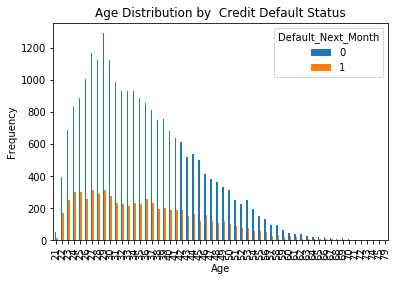

In [138]:
%matplotlib inline
#bar chart of age grouped by default
pd.crosstab(age,default_next_month).plot(kind='bar')
plt.title('Age Distribution by  Credit Default Status')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [139]:
#use dmatrics to prepare dependent variable matric and the independent variable vector
y,X=dmatrices('Default_Next_Month~LIMIT_BAL+SEX+EDUCATION+MARRIAGE+AGE+PAY_0+PAY_2+PAY_3+PAY_4+PAY_5+PAY_6+BILL_AMT1+BILL_AMT2+BILL_AMT3+BILL_AMT4+BILL_AMT5+BILL_AMT6+PAY_AMT1+PAY_AMT2+PAY_AMT3+PAY_AMT4+PAY_AMT5+PAY_AMT6+Interest_Rate+Employed_Persons+CPI+Consumer_Confidence',creditData, return_type='dataframe')
#flattern y into a 1-D array
y=np.ravel(y)
#then seperate it into training and test sets
X_training,X_test,y_training,y_test = train_test_split(X,y, test_size=0.3, random_state =0)

In [140]:
#fit logistic regression into the training set
classifier = LogisticRegression(random_state=0)
classifier.fit(X_training,y_training)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [141]:
#predict the default status for each sample in test set
predicted_status=classifier.predict(X_test)
print (predicted_status)

[ 0.  0.  0. ...,  0.  0.  0.]


In [142]:
#generate default probabilities based on test set
probs = classifier.predict_proba(X_test)
print(probs)

[[ 0.66804286  0.33195714]
 [ 0.67747996  0.32252004]
 [ 0.80380214  0.19619786]
 ..., 
 [ 0.72060512  0.27939488]
 [ 0.84517873  0.15482127]
 [ 0.89118104  0.10881896]]


In [143]:
# Model evaluation metrics
print (metrics.accuracy_score(y_test,predicted_status))
print (metrics.roc_auc_score(y_test,predicted_status))

0.784444444444
0.500186910429


In [144]:
print(metrics.confusion_matrix(y_test,predicted_status))
print (metrics.classification_report(y_test,predicted_status))

[[7059    1]
 [1939    1]]
             precision    recall  f1-score   support

        0.0       0.78      1.00      0.88      7060
        1.0       0.50      0.00      0.00      1940

avg / total       0.72      0.78      0.69      9000



In [145]:
#10-fold cross-validation 
scores = cross_val_score(LogisticRegression(),X,y,scoring='accuracy',cv=10)
print(scores)
print(scores.mean())

[ 0.7784072   0.77874042  0.77874042  0.77874042  0.77866667  0.77866667
  0.77825942  0.77892631  0.77892631  0.77892631]
0.778700013663
